<a href="https://colab.research.google.com/github/PAndersonSB/Projeto-1-Datascience/blob/main/Data_Science_Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fonte

https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

# Problema

A empresa automobilística chinesa Geely Auto aspira a entrar no mercado dos EUA estabelecendo sua unidade de fabricação lá e produzindo carros localmente para competir com seus colegas americanos e europeus.

Eles contrataram uma empresa de consultoria automobilística para entender os fatores dos quais depende o preço dos carros. Especificamente, eles querem entender os fatores que afetam os preços dos carros no mercado americano, pois podem ser muito diferentes do mercado chinês. A empresa quer saber:

Quais variáveis são significativas na previsão do preço de um carro
Quão bem essas variáveis descrevem o preço de um carro
Com base em várias pesquisas de mercado, a empresa de consultoria reuniu um grande conjunto de dados de diferentes tipos de carros em todo o mercado americano.

#Objetivo de Negócio

Somos obrigados a modelar o preço dos carros com as variáveis independentes disponíveis. Ele será usado pela administração para entender exatamente como os preços variam com as variáveis independentes. Eles podem manipular o design dos carros, a estratégia de negócios etc. para atender a determinados níveis de preços. Além disso, o modelo será uma boa maneira de a administração entender a dinâmica de preços de um novo mercado.

#Conhecendo os dados

importando bibliotecas

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
from google.colab import drive
drive.mount('/content/drive')
pasta = "/content/drive/My Drive/Colab Notebooks/Projeto 1/"
nome_arquivo_dados = "CarPrice_Assignment.csv"
dados = pd.read_csv(pasta + nome_arquivo_dados ,delimiter=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
dados.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


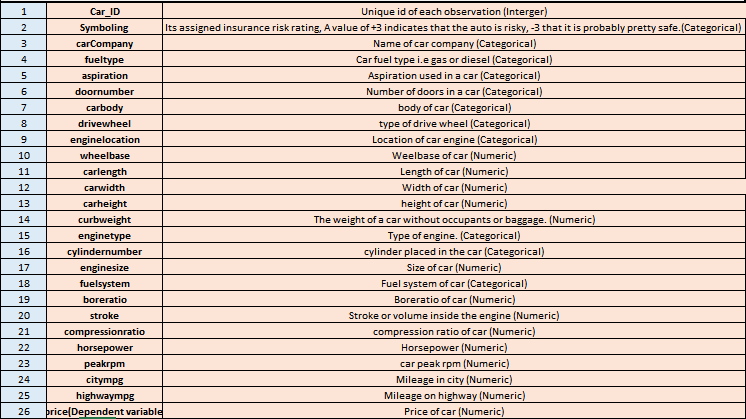

In [207]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

nenhum valor nulo em todas as colunas

In [208]:
dados.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

tipos de dados no dataset : inteiro , real e objeto(texto)

In [209]:
dados.shape

(205, 26)

205 linhas e 26 colunas

In [210]:
dados.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [211]:
'''for c in list(dados.columns): #todas as colunas
  print(c)
  print(dados[c].unique())
  print('\n') '''

"for c in list(dados.columns): #todas as colunas\n  print(c)\n  print(dados[c].unique())\n  print('\n') "

In [212]:
colunas = [ 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [213]:
for c in list(colunas): #apenas colunas selecionadas ↥ lista de colunas acima ↥
  print(c)
  print(dados[c].unique())
  print('\n')

symboling
[ 3  1  2  0 -1 -2]


fueltype
['gas' 'diesel']


aspiration
['std' 'turbo']


doornumber
['two' 'four']


carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


drivewheel
['rwd' 'fwd' '4wd']


enginelocation
['front' 'rear']


enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


boreratio
[3.47 2.68 3.19 3.13 3.5  3.31 3.62 2.91 3.03 2.97 3.34 3.6  2.92 3.15
 3.43 3.63 3.54 3.08 3.33 3.39 3.76 3.58 3.46 3.8  3.78 3.17 3.35 3.59
 2.99 3.7  3.61 3.94 3.74 2.54 3.05 3.27 3.24 3.01]


stroke
[2.68  3.47  3.4   2.8   3.19  3.39  3.03  3.11  3.23  3.46  3.9   3.41
 3.07  3.58  4.17  2.76  3.15  3.255 3.16  3.64  3.1   3.35  3.12  3.86
 3.29  3.27  3.52  2.19  3.21  2.9   2.07  2.36  2.64  3.08  3.5   3.54
 2.87 ]


compressionratio
[ 9.   10.    8.    8.5   8.3   7.    8.8   9.5   9.6   9.41  9.4   7.6
  9.2  10.1   9.1   8.1

In [214]:
print('preco minimo' ,dados['price'].min() )
print('preco maximo', dados['price'].max())

preco minimo 5118.0
preco maximo 45400.0


In [215]:
dados.describe().round(2)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


#Estatistica descritiva


Distribuição de frequencia


##variaveis qualitativas

In [216]:
def distruibuicao_de_frequencia(coluna):
  frequencia = dados[coluna].value_counts()
  percentual = dados[coluna].value_counts(normalize = True) * 100
  df = pd.DataFrame({'Frequencia':frequencia , 'Percentual (%)':percentual.round(2)})
  df.rename_axis(str(coluna) , axis = 1, inplace = True)

  return df

In [217]:
def distruibuicao_crosstab(coluna1 , coluna2):
  df = pd.crosstab(dados[coluna1], dados[coluna2] )
  return df

In [218]:
def distruibuicao_crosstab2(coluna1 , coluna2, coluna3):
  df = pd.crosstab(dados[coluna1],
                   dados[coluna2],
                   aggfunc = 'mean' , #media
                   values = dados[coluna3] )  #costuma ser a variavel dependente ex: preço
  return df

funções para diminuir a repetição de codigo

In [219]:
df = distruibuicao_de_frequencia('aspiration')
df

aspiration,Frequencia,Percentual (%)
std,168,81.95
turbo,37,18.05


A quantidade de carros turbo é bem menor que o de carros std

In [220]:
df = distruibuicao_de_frequencia('fueltype')
df

fueltype,Frequencia,Percentual (%)
gas,185,90.24
diesel,20,9.76


A quantidade de carros a diesel é bem menor que o de carros a gasolina

In [221]:
df = distruibuicao_crosstab('aspiration', 'fueltype')
df

fueltype,diesel,gas
aspiration,,
std,7,161
turbo,13,24


mesmo a quantidade de carros std sendo maior que a turbo , a quatidade de carros std que usa combustivel diesel é menor que o de carros turbo com combustivel diesel.

In [222]:
df= distruibuicao_crosstab2('aspiration', 'fueltype' , 'price')
df

fueltype,diesel,gas
aspiration,,
std,9670.571429,12739.127329
turbo,19159.153846,14748.465292


a média do preço dos carros.

enquanto a combinação turbo/diesel tem valor maior que turbo/gas

a combinação std/diesel tem valor menor que std/gas.

##Variaveis quantitativas

distruibuindo os valores em classes 

In [223]:
dados.price.min()

5118.0

In [224]:
dados.price.max()

45400.0

In [225]:
classes = [5110,25259,454041]

In [226]:
labels =['b','a']

In [227]:
frequencia = pd.value_counts(
  pd.cut(x = dados.price,
         bins = classes,
         labels = labels,
         include_lowest = True)
)
frequencia

b    187
a     18
Name: price, dtype: int64

In [228]:
percentual = pd.value_counts(
  pd.cut(x = dados.price,
         bins = classes,
         labels = labels,
         include_lowest = True),
  normalize = True
)
percentual

b    0.912195
a    0.087805
Name: price, dtype: float64

In [229]:
df = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
df

,Frequência,Porcentagem (%)
b,187,0.912195
a,18,0.087805


metodo 2

In [230]:
n = dados.shape[0]
n

205

In [231]:
k = 1 + (10 /3) * np.log10(n)
k = int(k.round(0))
k

9

In [232]:
frequencia = pd.value_counts(
  pd.cut(
    x = dados.price,
    bins = 9,
    include_lowest = True
  ),
  sort = False
)
frequencia

(5077.717, 9593.778]      92
(9593.778, 14069.556]     46
(14069.556, 18545.333]    36
(18545.333, 23021.111]    11
(23021.111, 27496.889]     3
(27496.889, 31972.667]     5
(31972.667, 36448.444]     7
(36448.444, 40924.222]     2
(40924.222, 45400.0]       3
Name: price, dtype: int64

In [233]:
percentual = pd.value_counts(
  pd.cut(
    x = dados.price,
    bins = 9,
    include_lowest = True
  ),
  sort = False,
  normalize = True
)
percentual

(5077.717, 9593.778]      0.448780
(9593.778, 14069.556]     0.224390
(14069.556, 18545.333]    0.175610
(18545.333, 23021.111]    0.053659
(23021.111, 27496.889]    0.014634
(27496.889, 31972.667]    0.024390
(31972.667, 36448.444]    0.034146
(36448.444, 40924.222]    0.009756
(40924.222, 45400.0]      0.014634
Name: price, dtype: float64

In [234]:
df = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
df

,Frequência,Porcentagem (%)
"(5077.717, 9593.778]",92,0.448780
"(9593.778, 14069.556]",46,0.224390
"(14069.556, 18545.333]",36,0.175610
"(18545.333, 23021.111]",11,0.053659
"(23021.111, 27496.889]",3,0.014634
"(27496.889, 31972.667]",5,0.024390
"(31972.667, 36448.444]",7,0.034146
"(36448.444, 40924.222]",2,0.009756
"(40924.222, 45400.0]",3,0.014634


#Análises gráficas

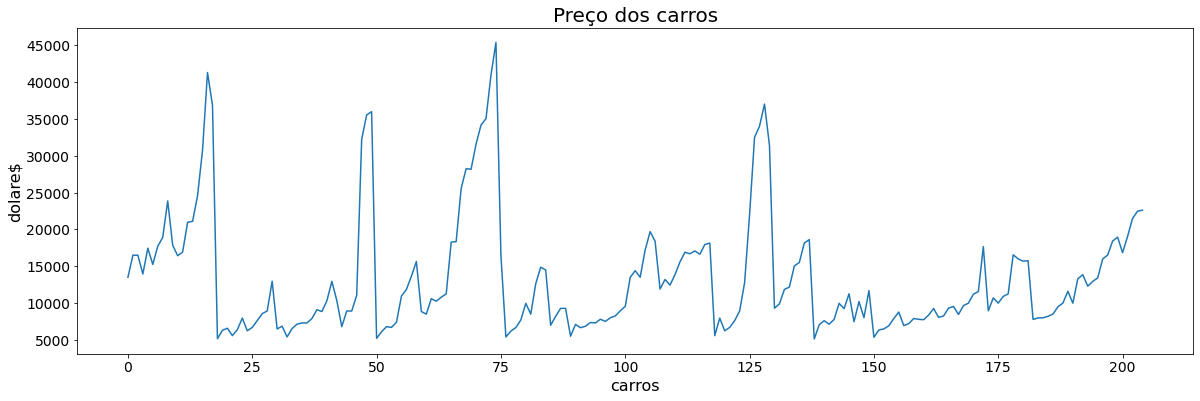

In [235]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Preço dos carros', fontsize=20)
ax.set_ylabel('dolare$', fontsize=16)
ax.set_xlabel('carros', fontsize=16)
ax = dados['price'].plot(fontsize=14)

comportamento da variavel dependente y

## boxplot

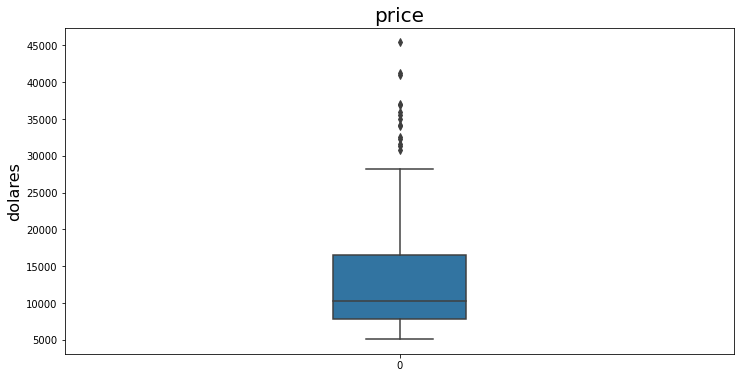

In [236]:
ax = sns.boxplot(data=dados['price'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('price', fontsize=20)
ax.set_ylabel('dolares', fontsize=16)
ax

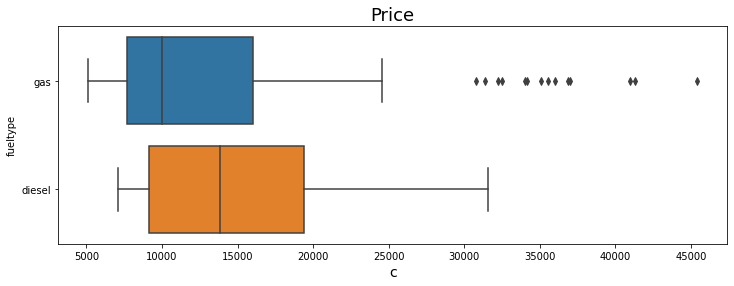

In [237]:
ax = sns.boxplot(y = 'fueltype', x = 'price', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Price', fontsize=18)
ax.set_xlabel('c', fontsize=14)
ax

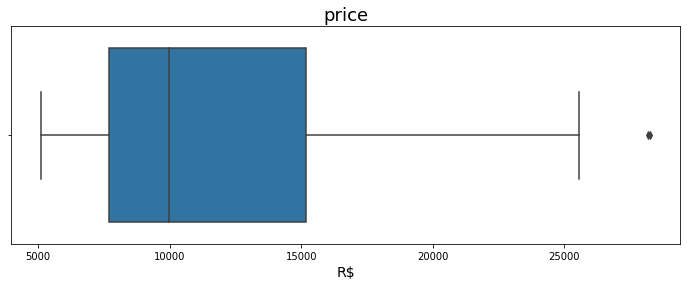

In [238]:
ax = sns.boxplot(x = 'price', data = dados.query('price < 30000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('price', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

##Histograma

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



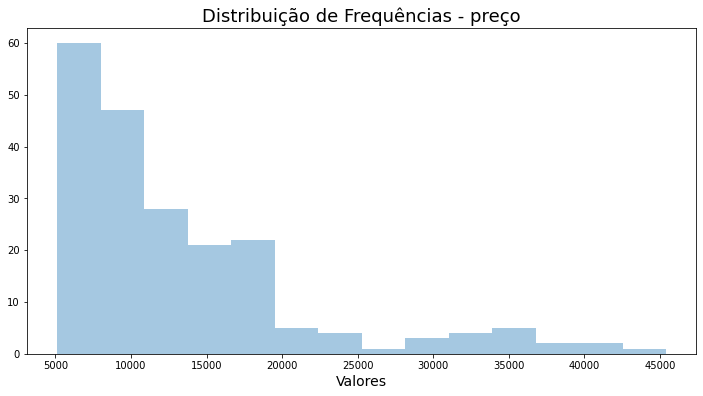

In [239]:
ax = sns.distplot(dados.price, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - preço', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)
ax

os dados tem uma assimetria à direita

In [240]:
valor = dados['price']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

selecao = (valor >= limite_inferior) & (valor <= limite_superior)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



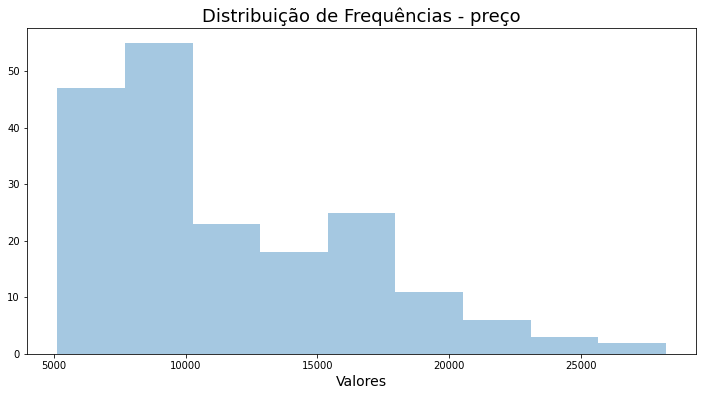

In [241]:
ax = sns.distplot(dados[selecao].price, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - preço', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)
ax

analisar mais os dados ou separar os dados em carros de baixo/alto padrão

#Machine learning.

##tratando dados

In [242]:
dados.iloc[:, [2 ,3, 4, 5 ,6 ,7 ,8 ,14 ,15 ,17]]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [243]:
dict = {'gas': 1, 'diesel': 2}
dados['fueltype'] = dados['fueltype'].map(dict)

In [244]:
dict = {'std': 1, 'turbo': 2}
dados['aspiration'] = dados['aspiration'].map(dict)

In [245]:
dict = {'two': 2, 'four': 4}
dados['doornumber'] = dados['doornumber'].map(dict)

In [246]:
dict = {'convertible': 1, 'hatchback': 2 ,'sedan': 3,'wagon': 4,'hardtop': 5}
dados['carbody'] = dados['carbody'].map(dict)

In [247]:
dict = {'rwd': 1, 'fwd': 2 ,'4wd': 3}
dados['drivewheel'] = dados['drivewheel'].map(dict)

In [248]:
dict = {'front': 1, 'rear': 2}
dados['enginelocation'] = dados['enginelocation'].map(dict)

In [249]:
dict = {'dohc': 1, 'ohcv': 2 ,'ohc': 3,'l': 4,'rotor': 5 ,'ohcf':6 ,'dohcv':7}
dados['enginetype'] = dados['enginetype'].map(dict)

In [250]:
dict = {'four': 4, 'six': 6 ,'five': 5,'three': 3,'twelve': 12 ,'two':2 ,'eight':8}
dados['cylindernumber'] = dados['cylindernumber'].map(dict)

In [251]:
dict = {'mpfi': 1, '2bbl': 2 ,'mfi': 3,'1bbl': 4,'spfi': 5 ,'4bbl':6 ,'idi':7 ,'spdi':8}
dados['fuelsystem'] = dados['fuelsystem'].map(dict)

##correlação e escolhendo colunas

In [252]:
correlacao = dados.corr()

In [254]:
correlacao.price

car_ID             -0.109093
symboling          -0.079978
fueltype            0.105679
aspiration          0.177926
doornumber          0.031835
carbody             0.161294
drivewheel         -0.577992
enginelocation      0.324973
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginetype         -0.092841
cylindernumber      0.718305
enginesize          0.874145
fuelsystem         -0.122118
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

###correlação *grafico*

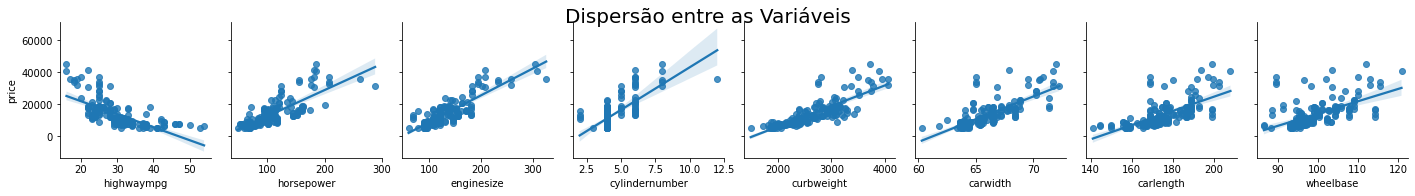

In [255]:
ax = sns.pairplot(dados, y_vars='price', x_vars=['highwaympg' ,'horsepower' ,'enginesize' , 'cylindernumber' ,'curbweight' ,'carwidth' ,'carlength' ,'wheelbase'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

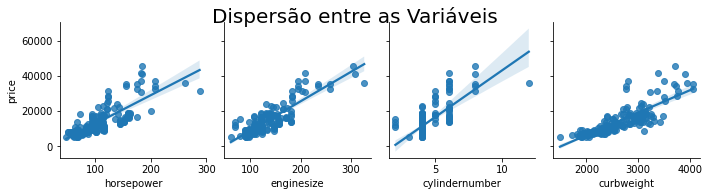

In [256]:
ax = sns.pairplot(dados, y_vars='price', x_vars=['horsepower' ,'enginesize' , 'cylindernumber' ,'curbweight'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

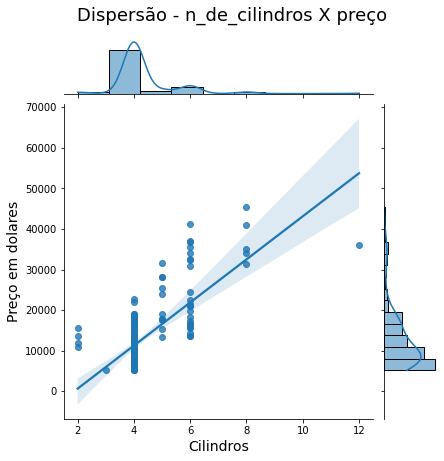

In [257]:
ax = sns.jointplot(x="cylindernumber", y="price", data=dados, kind='reg')
ax.fig.suptitle('Dispersão - n_de_cilindros X preço', fontsize=18, y=1.05)
ax.set_axis_labels("Cilindros", "Preço em dolares", fontsize=14)
ax

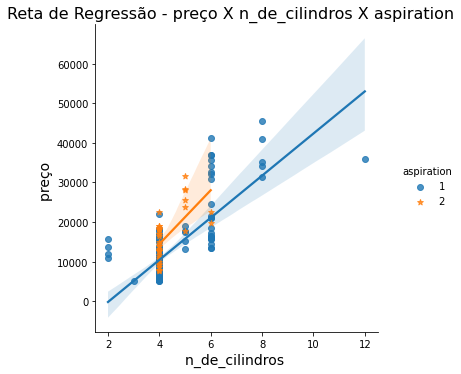

In [258]:
ax = sns.lmplot(x="cylindernumber", y="price", data=dados, hue="aspiration", markers=['o', '*'], legend=False)
ax.fig.suptitle('Reta de Regressão - preço X n_de_cilindros X aspiration', fontsize=16, y=1.02)
ax.set_xlabels("n_de_cilindros ", fontsize=14)
ax.set_ylabels("preço ", fontsize=14)
ax.add_legend(title="aspiration")
ax

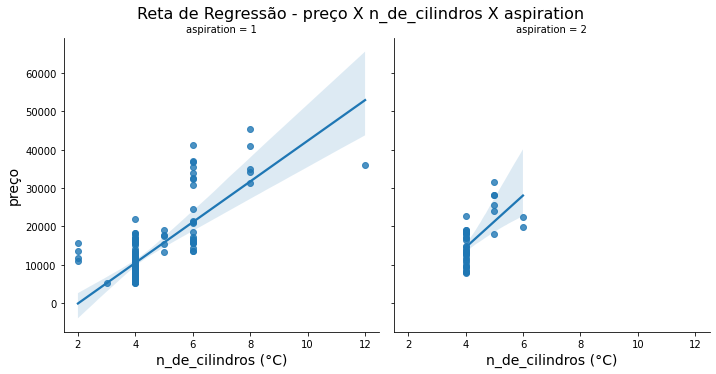

In [259]:
ax = sns.lmplot(x="cylindernumber", y="price", data=dados, col="aspiration")
ax.fig.suptitle('Reta de Regressão - preço X n_de_cilindros X aspiration', fontsize=16, y=1.02)
ax.set_xlabels("n_de_cilindros (°C)", fontsize=14)
ax.set_ylabels("preço", fontsize=14)
ax

###colunas x y

In [260]:
#0,69  0,8  0,8  0,71 0,8 0.7 0,68 0.5
X = dados[['highwaympg' ,'horsepower' ,'enginesize' , 'cylindernumber' ,'curbweight' ,'carwidth' ,'carlength' ,'wheelbase']]
y = dados['price']

In [261]:
# X  0,8  0,8 0,71 0,8 X X X
X = dados[['horsepower' ,'enginesize' , 'cylindernumber' ,'curbweight' ]]
y = dados['price']

##regressao

In [262]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [281]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

print('R² = {}'.format(regr.score(X_train, y_train).round(2)))

R² = 0.83


gerando modelo e score usando o dados de treino

In [282]:
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_[0])
print("Intercept: \n", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print('R² = %s' % r2_score(y_test, y_pred).round(2))

Coefficients: 
 52.27104581509909
Intercept: 
 -13669.93725967238
Mean squared error: 13843283.08
Coefficient of determination: 0.79
R² = 0.79


score usando o dados de teste

##Mais testes

In [267]:
regr.intercept_

-13669.93725967238

In [268]:
regr.coef_

array([52.27104582, 75.76231327, 36.1698097 ,  4.56802287])

In [269]:
X.columns

Index(['horsepower', 'enginesize', 'cylindernumber', 'curbweight'], dtype='object')

In [270]:
index=['Intercepto', 'horsepower', 'enginesize', 'cylindernumber', 'curbweight']

In [271]:
pd.DataFrame(data=np.append(regr.intercept_, regr.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,-13669.937260
horsepower,52.271046
enginesize,75.762313
cylindernumber,36.169810
curbweight,4.568023


##grafico

In [272]:
import plotly.graph_objects as go

In [283]:
fig = go.Figure(go.Scatter(x=dados['price'].index , y=dados['price'].values , name='Dados Reais',mode='markers'))
fig.add_trace(go.Scatter(x=dados['price'].index , y=regr.predict(X), name='Regressão Linear'))

fig.show()

**CARACA QUE MANEIRO**

In [274]:
y_pred_train = regr.predict(X_train)

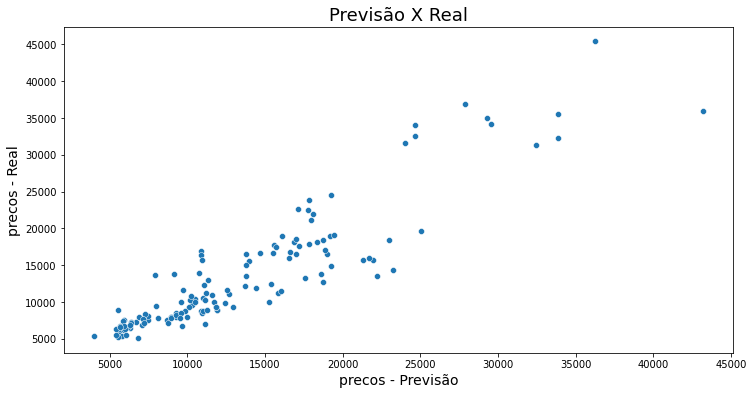

In [275]:
ax = sns.scatterplot(x=y_pred_train, y=y_train )
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('precos - Previsão', fontsize=14 ,)
ax.set_ylabel('precos - Real', fontsize=14)
ax

In [276]:
residuo = y_train - y_pred_train

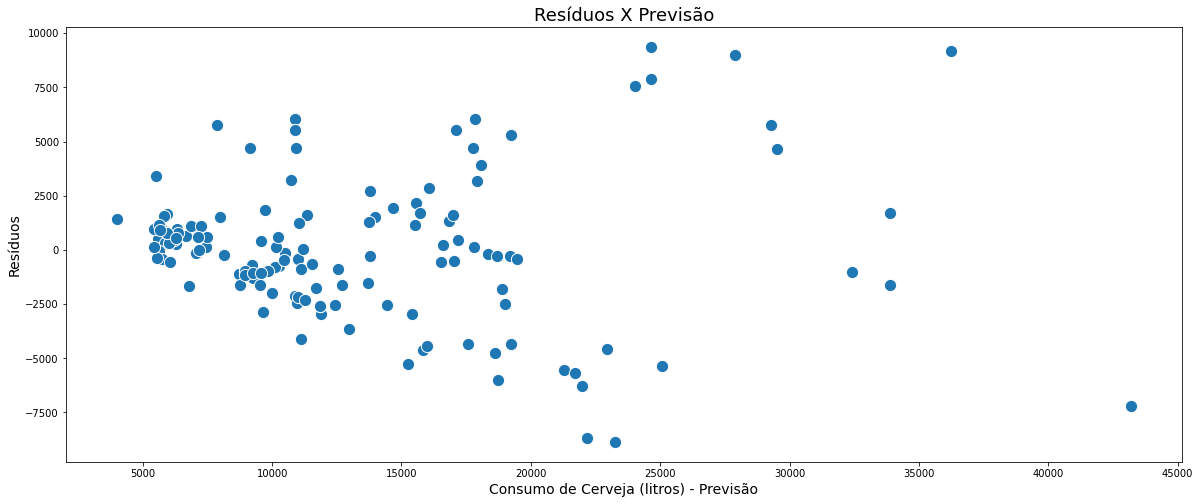

In [277]:
ax = sns.scatterplot(x=y_pred_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preços - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

metricas

In [278]:
EQM = mean_squared_error(y_test, y_pred).round(2)
REQM = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
R2 = r2_score(y_test, y_pred).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,13843283.08
REQM,3720.66
R²,0.79


#salvando modelo

In [279]:
import pickle

In [280]:
output = open('modelo_carros', 'wb')
pickle.dump(regr, output)
output.close()